<a href="https://colab.research.google.com/github/MayarQasrawi/Artificial-Intelligent/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭐Team Members:

1. Abrar Arman| 202110760
2. Mayar Qasarwa| 202110541





#⭐ Part 1
### In this part we used PyCart Library


###  Instal Packeges & Import Libraries

In [4]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 109.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.4 MB/s eta 0:00:00
   ━━

In [1]:
from pycaret.regression import *
import pandas as pd

### Load Dataset

In [2]:
file_path = '/content/drive/MyDrive/Datasets/TG_T_CashValues_Rel.xlsx'
df2 = pd.read_excel(file_path)
df2.head(n=1)

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437


### Split the data Tain_Test


In [3]:
# 80% for training 20% for testing
from sklearn.model_selection import cross_val_score, KFold, train_test_split


kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Data setup

In [9]:
exp = setup(df2, target='PPV',
            fold=5)

,Description,Value
0,Session id,1505
1,Target,PPV
2,Target type,Regression
3,Original data shape,"(5270, 4)"
4,Transformed data shape,"(5270, 4)"
5,Transformed train set shape,"(3688, 4)"
6,Transformed test set shape,"(1582, 4)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


### Model selection
Choose a suitable model based on the dataset characteristics and evaluation metrics.

In [10]:
# Compare models performs cross-validation internally
best_model = compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0112,0.0010,0.0315,1.0000,0.0026,0.0008,0.4820
xgboost,Extreme Gradient Boosting,0.0333,0.0039,0.0626,0.9999,0.0042,0.0025,0.1620
lightgbm,Light Gradient Boosting Machine,0.0367,0.0050,0.0704,0.9999,0.0051,0.0030,0.2740
rf,Random Forest Regressor,0.0425,0.0057,0.0753,0.9999,0.0059,0.0033,0.4340
dt,Decision Tree Regressor,0.0588,0.0124,0.1112,0.9997,0.0075,0.0041,0.0520
gbr,Gradient Boosting Regressor,0.0799,0.0177,0.1322,0.9996,0.0114,0.0080,0.2520
knn,K Neighbors Regressor,0.1894,0.0675,0.2598,0.9986,0.0433,0.0294,0.0640
ada,AdaBoost Regressor,0.5631,0.4391,0.6621,0.9911,0.0948,0.0766,0.2500
huber,Huber Regressor,1.0787,1.7988,1.3402,0.9637,0.2077,0.1946,0.0640
ridge,Ridge Regression,1.1032,1.7560,1.3243,0.9645,0.1957,0.1838,0.0460


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

### Model Tuning
Tune hyperparameters for better performance

In [11]:
best_model=create_model('rf')
tuned_model = tune_model(best_model) #choose lightgbm to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0411,0.0054,0.0732,0.9999,0.0056,0.0031
1,0.0425,0.0060,0.0773,0.9999,0.0060,0.0032
2,0.0469,0.0068,0.0823,0.9999,0.0062,0.0035
3,0.0394,0.0046,0.0680,0.9999,0.0056,0.0031
4,0.0425,0.0057,0.0754,0.9999,0.0062,0.0034
Mean,0.0425,0.0057,0.0753,0.9999,0.0059,0.0033
Std,0.0025,0.0007,0.0047,0.0000,0.0003,0.0002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2865,0.1598,0.3997,0.9966,0.0268,0.0206
1,0.2793,0.1468,0.3832,0.9971,0.0263,0.0200
2,0.2647,0.1536,0.3919,0.9968,0.0260,0.0190
3,0.2631,0.1300,0.3605,0.9974,0.0253,0.0195
4,0.2893,0.1521,0.3900,0.9970,0.0287,0.0219
Mean,0.2766,0.1485,0.3851,0.9970,0.0266,0.0202
Std,0.0109,0.0101,0.0134,0.0003,0.0012,0.0010


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


> Note: we can create model using `create_model('et')` function.

In [12]:

final_model = finalize_model(tuned_model)

### Make Predictions

In [27]:
predictions = predict_model(final_model, data=df2)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0080,0.0002,0.0152,1.0000,0.0012,0.0006


,Gender,Age,Dur,PPV,prediction_label
0,Male,0,20,15.198438,15.197792
1,Male,0,21,15.741014,15.740366
2,Male,0,22,16.267189,16.266175
3,Male,0,23,16.777449,16.776716
4,Male,0,24,17.272268,17.271464


the `cross_val_score` function from `scikit-learn` returns a NumPy array containing the scores for each fold of the cross-validation.

In [21]:
cv= cross_val_score(final_model, df2.drop('PPV', axis=1), df2['PPV'], cv=kf, scoring='neg_mean_absolute_error')


In [24]:
print(predictions[:])

[-0.02893443 -0.02721781 -0.02783267 -0.02855141 -0.0284444 ]


In [26]:
import numpy as np
# Convert the negative MAE scores to positive
mae_scores = -cv
#To get the mean MAE across all folds
print(np.mean(mae_scores))

0.02819614259947083


In [28]:
print(final_model)


Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Age', 'Dur'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender'],
                                    transformer=OrdinalEncoder(cols=['Gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64}]))),
                (


> ### ⚡Actual PPV vs. Predicted PPV



In [29]:
print(predictions[['PPV', 'prediction_label']])

            PPV  prediction_label
0     15.198438         15.197792
1     15.741014         15.740366
2     16.267189         16.266175
3     16.777449         16.776716
4     17.272268         17.271464
...         ...               ...
5265   1.925421          1.922875
5266   2.777638          2.774419
5267   1.000000          1.000000
5268   1.920897          1.918165
5269   1.000000          1.000000

[5270 rows x 2 columns]


### Calculate Metrics

We can implement MAE like this:
```
def calculate_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

```
how ever we will use `sklearn.metrics.mean_absolute_error`doe to it efficiency and conciseness.

In [34]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def calculate_mse(y_true, y_pred):
    """Calculates Mean Squared Error."""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean((y_true - y_pred)**2)

def evaluate_model(model, X_test, y_test):
    """Evaluates the model and returns MSE and MAE."""
    y_pred = model.predict(X_test)
    mse = calculate_mse(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae

data_test = df2.sample(frac=0.2, random_state=42)
x_test = data_test.drop('PPV', axis=1)
y_test = data_test['PPV']
mse, mae = evaluate_model(final_model, x_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.0002740479690565373
Mean Absolute Error: 0.008545083220284811


### Analyze Model

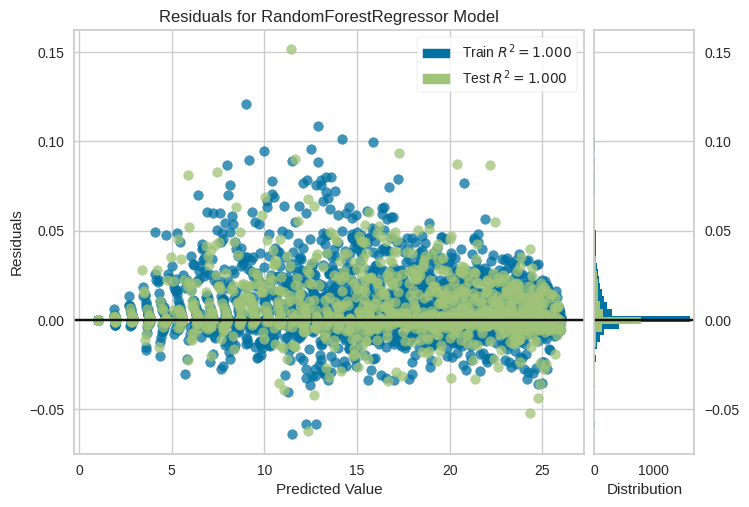

In [35]:
plot_model(final_model)

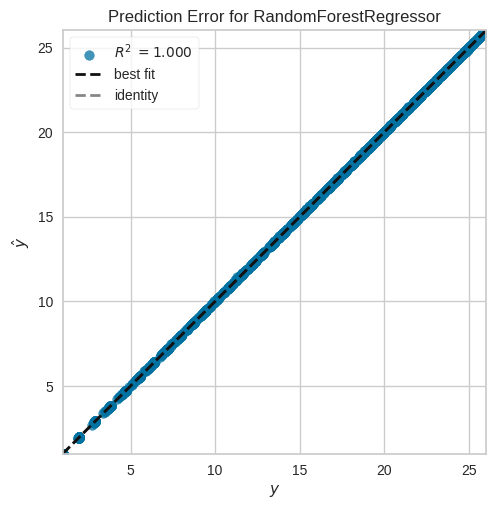

In [36]:
plot_model(final_model, plot = 'error')

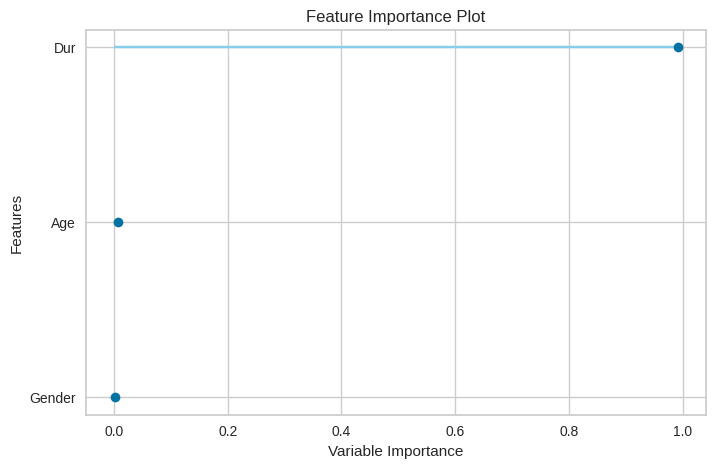

In [37]:
plot_model(final_model, plot = 'feature')



> ### The plot show that Prediction of `PPV` is based on the `Dur` as a first features and the other featuers (Age/Gender) are not include.



In [40]:
save_model(final_model, 'final_ Regreesion_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Dur'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Female    0
 Male      1
 NaN      -1
 dtype: int64}]))),


In [41]:
loaded_model = load_model('final_ Regreesion_model')
new_prediction= predict_model(loaded_model, data=data_test)
new_prediction.head()

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.0085,0.0003,0.0166,1.0000,0.0013,0.0006


,Gender,Age,Dur,PPV,prediction_label
3686,Female,24,42,23.751965,23.751769
8,Male,0,28,19.106190,19.105948
1536,Male,34,30,19.302021,19.318089
3538,Female,21,44,24.339920,24.343926
5235,Female,73,2,1.942791,1.942314


> By using `load_model('final_ Regreesion_model')` function we load the model


```
predict_model(saved_final, data=test_data)
new_prediction.head()

```



# ⭐ Part 2
 In this part we Used Scikit-learn to train our Regression model.
bold text
### Algorithm
*   Simple Linear Regression
*   Decision Tree Regressor



## Import Libreries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##Load Data


In [ ]:

file_path = '/content/drive/MyDrive/Datasets/TG_T_CashValues_Rel.xlsx'
df = pd.read_excel(file_path)
print(df)

      Gender  Age  Dur        PPV
0       Male    0   20  15.198437
1       Male    0   21  15.741015
2       Male    0   22  16.267189
3       Male    0   23  16.777448
4       Male    0   24  17.272269
...      ...  ...  ...        ...
5265  Female   78    2   1.925421
5266  Female   78    3   2.777638
5267  Female   79    1   1.000000
5268  Female   79    2   1.920897
5269  Female   80    1   1.000000

[5270 rows x 4 columns]


### ⚡ PPV stands for Pay-Per-View


## Data exploritery

In [ ]:
df.head()

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269


In [ ]:
df.describe()

,Age,Dur,PPV
count,5270.000000,5270.000000,5270.000000
mean,31.294118,22.882353,14.858158
std,18.671548,13.793388,7.025862
min,0.000000,1.000000,1.000000
25%,16.000000,11.000000,9.374980
50%,30.000000,22.000000,15.703883
75%,45.000000,34.000000,20.953996
max,80.000000,50.000000,26.024118


In [ ]:
df.columns

Index(['Gender', 'Age', 'Dur', 'PPV'], dtype='object')

In [ ]:
df.shape

(5270, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5270 non-null   object 
 1   Age     5270 non-null   int64  
 2   Dur     5270 non-null   int64  
 3   PPV     5270 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 164.8+ KB


## Data Cleaning
There is no missing value in the data set to be handle

## Feature Extraction


In [ ]:
correlation_matrix = df[['Age','PPV','Dur']].corr()
print(correlation_matrix)

          Age       PPV       Dur
Age  1.000000 -0.565087 -0.507243
PPV -0.565087  1.000000  0.978774
Dur -0.507243  0.978774  1.000000


## 🗒 Note:
**Dur** has the highest correlation coefficient (0.978774) with PPV. This indicates a very strong positive linear relationship between the two variables.

While **Age** also shows a negative correlation with PPV (-0.565087), the correlation is weaker compared to Dur.

In [ ]:
import seaborn as sns

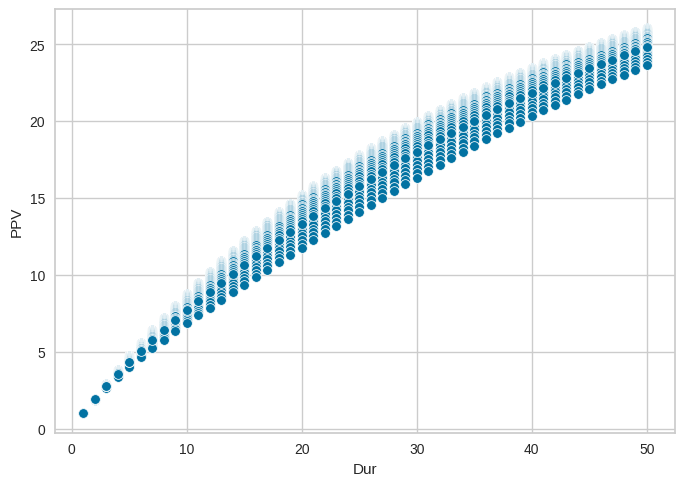

In [ ]:
sns.scatterplot(x="Dur", y="PPV", data=df);

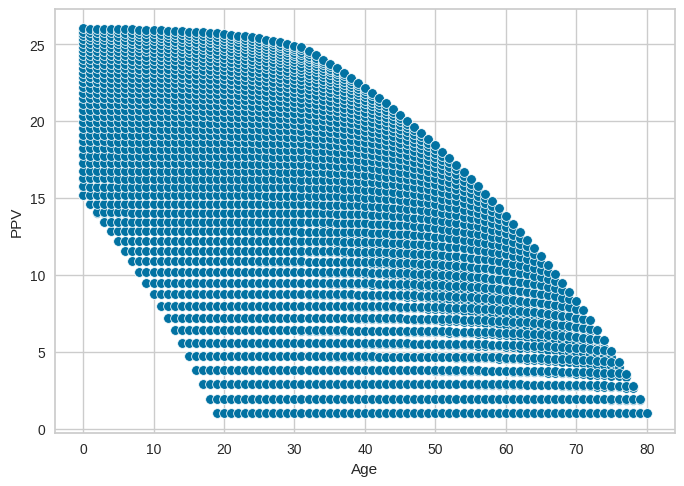

In [ ]:
sns.scatterplot(x="Age", y="PPV", data=df);

## Spliting the Data

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# Reshape x to be 2-dimensional using reshape()
x=df['Dur'].values.reshape(-1, 1)
# Or, select the column as a DataFrame using double brackets
# x = df[['Dur']]
y=df['PPV']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)


## Train the Model


### Simple Regreesion

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print("Coefficients:", regr.coef_)
print("-" * 30)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("-" * 30)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: [0.49840806]
------------------------------
Mean squared error: 2.05
------------------------------
Coefficient of determination: 0.96


In [ ]:
prediction = regr.predict(x_test[[0]])
prediction

array([4.43653938])

In [ ]:
y_test.iloc[0]

1.96891174757282

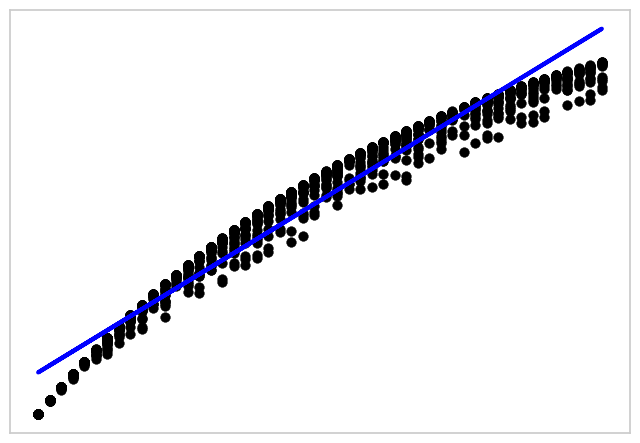

In [ ]:
# Assuming 'Dur' is the most relevant feature for the scatter plot,
# which is what you used for x during training:
plt.scatter(x_test[:, 0], y_test, color="black")  # Access the 'Dur' values directly

# The rest of the code remains the same:
plt.plot(x_test[:, 0], y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

### Sconed algorithm| DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
'''
in this model we first we try to Train the model Without including catogeric data

'''
x= df.drop(['PPV','Gender'], axis=1)
y= df['PPV']
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)
model2 = DecisionTreeRegressor()

# Train the model using the training sets
model2.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = model2.predict(x_test)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("-" * 30)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.21
------------------------------
Coefficient of determination: 1.00


In [ ]:
prediction = model2.predict(x_test.iloc[[0]])
prediction

array([1.96690398])

In [ ]:
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing set has {} samples.".format(x_test.shape[0]))

Training set has 3952 samples.
Testing set has 1318 samples.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
'''
In the second model, here we encode the 'Gender' and involves this featuer in the training
 as a result the accuracy of the model was improve

'''

x = df.drop('PPV', axis=1)
y = df['PPV']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse_output=False for non-sparse matrix

# Fit and transform the encoder on the 'Gender' column
encoded_gender = encoder.fit_transform(x[['Gender']])

# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(['Gender'])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_gender, columns=encoded_feature_names, index=x.index)

# Drop the original 'Gender' column and concatenate the encoded features
x = x.drop('Gender', axis=1)
x = pd.concat([x, encoded_df], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("-" * 30)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.01
------------------------------
Coefficient of determination: 1.00


In [ ]:
prediction = model2.predict(x_test.iloc[[0]])
prediction

array([1.96690398])

## 🔻Note
> while pycart provides a basic implementation, scikit-learn's  is vastly superior in terms of features, performance, and integration with the broader machine learning ecosystem.
For any real-world regression problem, scikit-learn is the clear choice.


